In [1]:
import ganja.io as io

Welcome to ROOTaaS 6.06/05


In [2]:
from glob import glob
import os

reload(io)

base = '/scratch/musella/ganja/prod_oct25_v0'
folders = glob('%s/QCD*' % base)

inputs = {}
for folder in folders:
    files = list(map(lambda x: int(os.path.basename(x).replace('.json','')), glob('%s/*.json' % folder) )) 
    inputs[folder] = files
    
%time proc_ids,df = io.read_datasets(inputs)

reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_470to600
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_600to800
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_1400to1800
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_1000to1400
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_1800
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_800to1000
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_300to470
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_120to170
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_50to80
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_80to120
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_30to50
reading /scratch/musella/ganja/prod_oct25_v0/QCD_Pt_170to300
CPU times: user 3min 9s, sys: 5.41 s, total: 3min 14s
Wall time: 3min 49s


In [3]:
weights = df.groupby(['proc'])['weight'].mean()

In [4]:
weights /= weights.max()

In [5]:
for proc in proc_ids:
    print(proc_ids[proc],weights[proc])

('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_470to600', 4.0364761895555784e-06)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_600to800', 2.5308951278261032e-06)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_1400to1800', 2.9422486448781496e-09)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_1000to1400', 2.4502046339003463e-07)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_1800', 6.1536268958674224e-11)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_800to1000', 8.4320132849691313e-07)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_300to470', 3.367600636274883e-05)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_120to170', 0.0023155656399257729)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_50to80', 0.12210450535166174)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_80to120', 0.014989733843812745)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_30to50', 1.0)
('/scratch/musella/ganja/prod_oct25_v0/QCD_Pt_170to300', 0.00053790704652202713)


In [6]:
# df = df[df.ptGen>40.]
print(df.ptGen.min(),df.ptGen.max())

(3.0022037, 2712.8179)


In [7]:
df.shape

(68700043, 10)

In [8]:
smpl = df.sample(10000000)

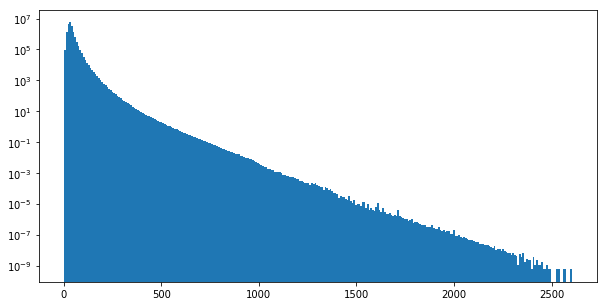

In [9]:
pt_wei,pt_bins,_=plt.hist(smpl.ptGen,bins=300,weights=smpl.weight)
plt.yscale('log')

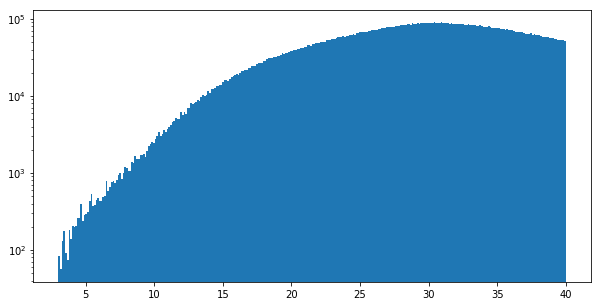

In [10]:
  plt.hist(smpl.ptGen,bins=300,range=[3.,40.],weights=smpl.weight)
plt.yscale('log')

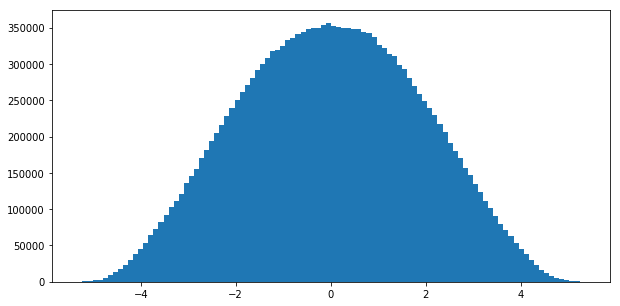

In [11]:
plt.hist(smpl.etaGen,bins=100,weights=smpl.weight);
# plt.yscale('log')

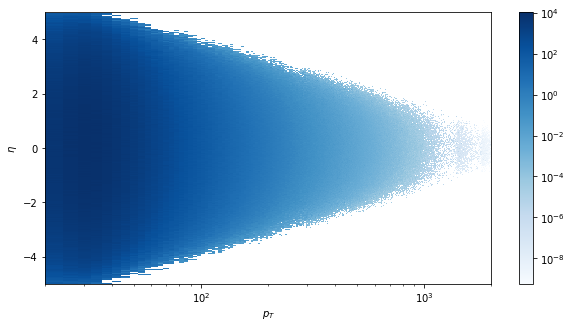

In [12]:
from matplotlib.colors import LogNorm
plt.hist2d(smpl.ptGen,smpl.etaGen,bins=500,range=[[20,2000],[-5,5]],
           weights=smpl.weight,norm=LogNorm(),cmap='Blues');
plt.xscale('log')
plt.colorbar()
plt.xlabel('$p_T$')
plt.ylabel('$\eta$')

# plt.zscale

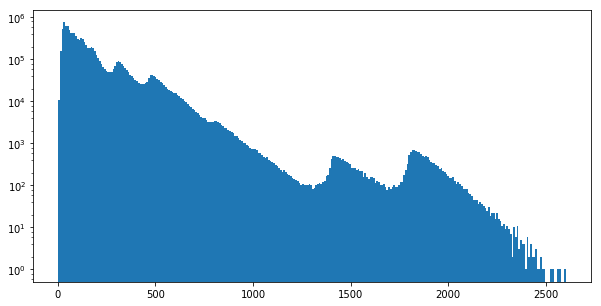

In [13]:
pt_evts,_,_=plt.hist(smpl.ptGen,bins=pt_bins)
plt.yscale('log')

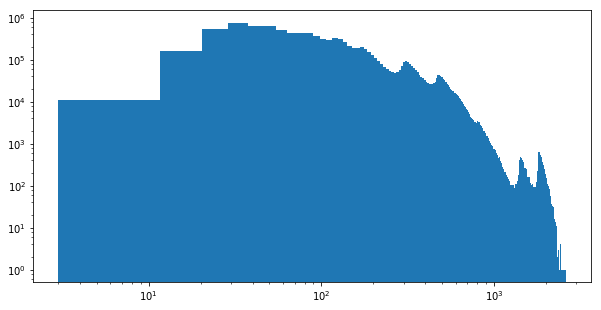

In [14]:
pt_evts,_,_=plt.hist(smpl.ptGen,bins=pt_bins)
plt.yscale('log')
plt.xscale('log')

In [15]:
import GAN.preprocessing as preprocessing
reload(preprocessing)
# smpl.weight = 1./smpl.weight
# rewei = 1./pt_vals
# rewei = pt_wei / pt_evts
rewei = np.exp( -0.5*( (pt_bins[1:]+pt_bins[:-1]) - pt_bins[0] ) * 7e-3 ) / pt_evts
rewei [rewei == np.inf] = rewei.min()
# rewei *= pt_vals.sum()/rewei.sum()

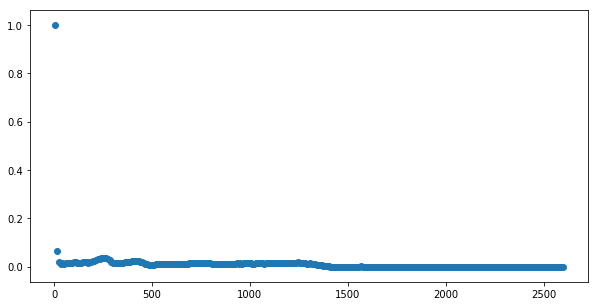

In [16]:
plt.scatter(0.5*(pt_bins[1:]+pt_bins[:-1]),rewei/rewei.max())

In [17]:
weights = preprocessing.reweight(smpl,['ptGen'],[pt_bins],rewei,None,offset=False)

('offset', False)
(301,)
              ptGen
count  1.000000e+07
mean  -9.223372e+11
std    2.916686e+15
min   -9.223372e+18
25%    5.000000e+00
50%    1.100000e+01
75%    2.100000e+01
max    2.990000e+02


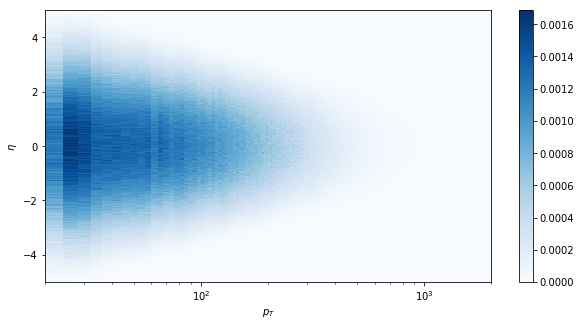

In [18]:
from matplotlib.colors import LogNorm
pt_eta_hist = plt.hist2d(smpl.ptGen,smpl.etaGen,bins=500,range=[[20,2000],[-5,5]],
           weights=weights,cmap='Blues')#norm=LogNorm(),cmap='Blues');
plt.xscale('log')
plt.colorbar()
plt.xlabel('$p_T$')
plt.ylabel('$\eta$')

In [19]:
pt_eta_vals = pt_eta_hist[0]

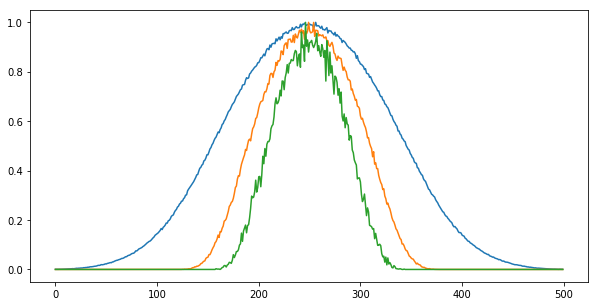

In [20]:
plt.plot(pt_eta_vals[:100,:].sum(axis=0)/pt_eta_vals[:100,:].sum(axis=0).max())
plt.plot(pt_eta_vals[100:200,:].sum(axis=0)/pt_eta_vals[100:200,:].sum(axis=0).max())
plt.plot(pt_eta_vals[200:300,:].sum(axis=0)/pt_eta_vals[200:300,:].sum(axis=0).max())
#plt.plot(pt_eta_vals[300:400,:].sum(axis=0))
#plt.plot(pt_eta_vals[400:,:].sum(axis=0))

#plt.plot(pt_eta_vals[20:3,:])
#plt.plot(pt_eta_vals[10,:])

In [21]:
weights.min()

3.7614830270361649e-09

In [22]:
weights.max()

8.735817773672383e-05

In [23]:
weights /= weights.max()

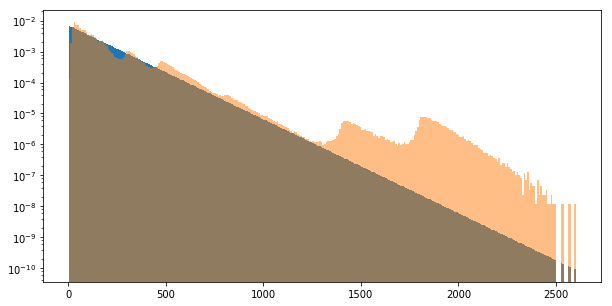

In [24]:
pt_hist=plt.hist(smpl.ptGen,bins=pt_bins,weights=weights,normed=True)
pt_hist=plt.hist(smpl.ptGen,bins=pt_bins,weights=None,normed=True,alpha=0.5)

plt.yscale('log')
# plt.xscale('log')

In [25]:
# clipped_weights = np.clip(weights,0.,weights.min()*1e+8)
# pt_hist=plt.hist(smpl.ptGen,bins=pt_bins,weights=clipped_weights)
# # plt.yscale('log')


In [26]:
# # weights.min()
# ptMean = smpl.groupby(['proc'])[ 'ptGen'].mean()
# smpl['ptMean'] = smpl['proc'].apply(lambda x: ptMean.loc[x] )

In [27]:
# plt.scatter(smpl.ptGen,weights)#,c=smpl.ptMean,cmap='Blues')
# # plt.colorbar()
# # plt.yscale('log')

In [28]:
# plt.scatter(smpl.ptGen-smpl.ptMean,weights,c=smpl.ptMean,cmap='Blues')
# plt.colorbar()
# # plt.yscale('log')

In [29]:
# weights /= weights.mean()

In [30]:
# (weights < .8).sum() / float(weights.shape[0])